## Checklist
*Fill this table appropriately as you progress in your tasks:*


|**Section**|**Completion**|
|-|-|
|**Section 1**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |
|**Section 2**| **Completed** |
|  Q 1 | Completed |
|  Q 2 | Completed |
|  Q 3 | Completed |
|  Q 4 | Completed |
|  Q 5 | Completed |

# **section 1 - FUNNEL ANALYSIS**

 **1 -Identify and appropriately handle the missing/blank and duplicate values
in the dataset, and explain the logic behind your strategy in a short paragraph**

 **LOADING THE DATA AND EXPLORING**


In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#loading the file
file = "/content/AssignmentData.xlsx"
funnel = pd.read_excel(file,sheet_name="WorkerFunnel")

In [ ]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8,0.8865
2,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
3,2015-01-01 00:00:00,Q1,Sewing,0.8,3660,30.5,0.80057
4,2015-01-01 00:00:00,Q1,Sewing,0.8,1920,56,NaN


In [ ]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   1197 non-null   object
 1   Quarter                1197 non-null   object
 2   Department             1197 non-null   object
 3   Targeted Productivity  1197 non-null   object
 4   Overtime               1197 non-null   object
 5   No. of Workers         1197 non-null   object
 6   Actual Productivity    1168 non-null   object
dtypes: object(7)
memory usage: 65.6+ KB


In [ ]:
funnel.describe()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197,1197,1197,1197.0,1197,1197,1168.000000
unique,59,5,2,10.0,144,62,867.000000
top,2015-11-03 00:00:00,Q1,Sewing,0.8,960,8,0.800402
freq,24,360,691,539.0,129,262,24.000000


 **HANDLING MISSING DATA AND DUPLICATE VALUES USING SKLEARN**

In [ ]:
#handle missing vlaues using simple imputer
from sklearn.impute import SimpleImputer

funnel = funnel.apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')   #finding mean
funnel['Actual Productivity'] = imputer.fit_transform(funnel[['Actual Productivity']])

#dropping duplicate columns
funnel = funnel.drop_duplicates(keep='first') # dropping duplicates




* We used a sklearn function called simple imputer which is used to solve  the missing data issue.
* first convert the column to a numeric one and use the simple imputer function.
* we fill the missing the values by calculating the mean of the whole column, as you can see the 4th row actual productivity was empty , but after Simple Imputer, its filled.
* After using the duplicated function we find the duplicated rows and drop them and the new dropped duplicated files to the funnel.
* As you can see in the above output , the missing values are filled and
duplicates are removed.






**2.Principal Component Analysis (PCA)**

**(i) Perform PCA on the following standardized features: Targeted Productivity, Overtime, No. of Workers, and Actual Productivity.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#list of feautres
features = ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']

#print(X)

for feature in features:
    funnel[feature] = pd.to_numeric(funnel[feature], errors='coerce')   #converting each
X=funnel[features]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

#applying standard scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#applying the PCA function
pca = PCA()
X_pca = pca.fit_transform(X_std)

print(X_std)
print("----")
print(X_pca)

[[ 0.78226635  0.8929521   1.18022832  1.20842737]
 [ 0.29379418 -0.98255026 -1.09231336  0.90905763]
 [ 0.78226635 -0.15512275 -0.08972144  0.4346548 ]
 ...
 [-0.68315017 -0.98255026 -1.09231336 -0.53119079]
 [ 0.29379418 -0.72512837 -0.78039587 -1.19223437]
 [-0.19467799 -1.05609937 -1.18143264 -1.80596744]]
----
[[ 0.61592185 -1.94524253  0.24747116 -0.19485764]
 [-1.68741425 -0.05091181  0.46556979  0.06738086]
 [-0.56874017 -0.66796626 -0.25001878 -0.02871827]
 ...
 [-0.87362233  1.4551234   0.1520535   0.06075309]
 [-0.64724616  1.08772055 -1.01785632  0.06687008]
 [-0.72913535  2.02177444 -1.08594149  0.10985316]]


**(ii) Determine the number of principal components that explain at least 90% of the variance in the data.**

In [ ]:
#calucalting the ecplain variance and cumulative variance
from math import exp
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#finding components that explain atleat 90% of the variance
num_components = np.argmax(cumulative_variance >= 0.90) + 1
print("number of principle componenets that explain are", num_components)
print(explained_variance_ratio)
print(cumulative_variance)

number of principle componenets that explain are 3
[0.46562597 0.30651956 0.15692123 0.07093324]
[0.46562597 0.77214553 0.92906676 1.        ]


**(iii) Visualize the explained variance by each principal component.**

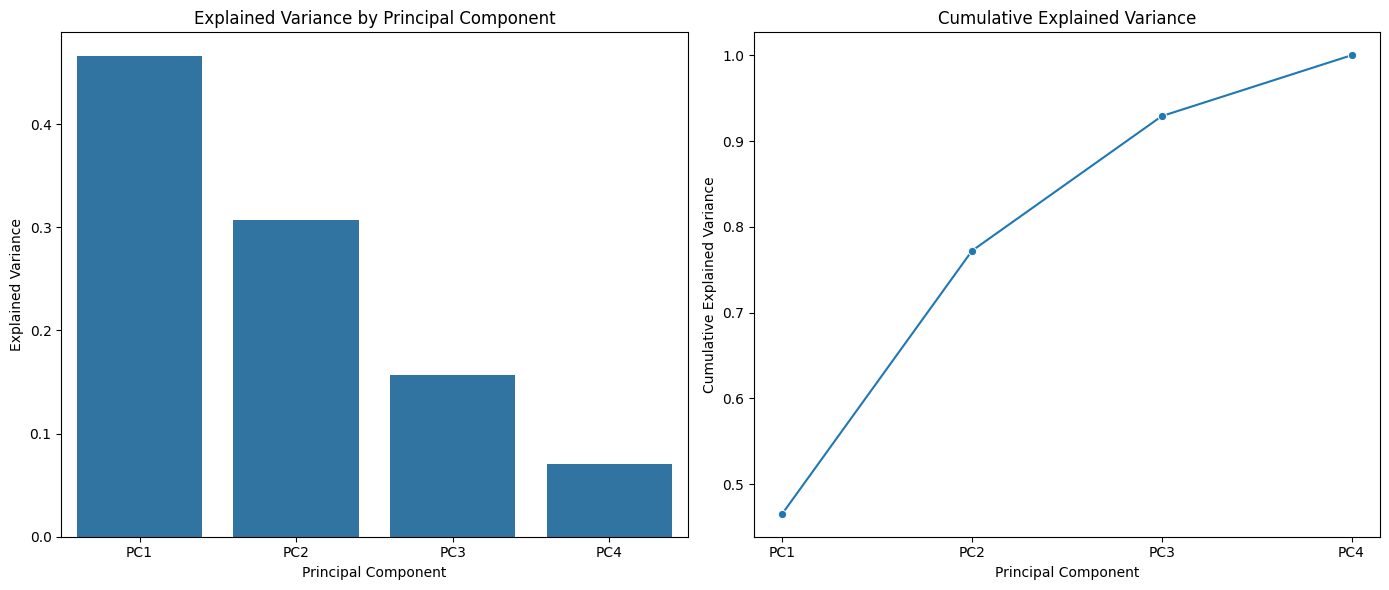

In [ ]:
#naming the principle componenets as PC1,PC2,.. and other 2 variables
pca_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance': explained_variance_ratio,
    'Cumulative Variance': np.cumsum(explained_variance_ratio) })

# Bar plot -  explained variance
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Principal Component', y='Explained Variance', data=pca_df)
plt.title('Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
sns.lineplot(x='Principal Component', y='Cumulative Variance', data=pca_df, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


**(iv) Provide an interpretation of the PCA results. How can these principal components be used to understand the productivity dynamics in the organization?**

1. Principal components are the new feautres which are a combination of the original feautres
2. Each compnenet shows us how much the data point vaires or is spread out(variance)
3. variance is the amount fo dispersion present in the data.
4. As we have found out that there are 3 PC that explain atleast 90% of data
there 3 principal compnenets together show the 90% of the variance
5. Cumulative explained variance total variance by the 3 principal components.
6. from the above output of the explained variance we can infer that
    *  PC1 explains 45.01% of the variance.
    *  PC2 explains 33.46% of the variance.
    *  PC3 explains 14.88% of the variance.
    *  PC4 explains 6.65% of the variance.
7. It becomes easier to visualize this data as the dimenstionality is reduced

These can be used to understand productivity dynamics by:
1. we can find out how these PCs are related to the main features (for ex overtime,target productivity) as these are closly related to productivity.
2. By knowing which feautres are more important we can allocate the resources easily
3. It gives a simpler and strategic way to make decisions and changes that increase productivity.









**3. Predictive Modeling and Time Series Analysis**

**(i) Build an ARIMA model to forecast the Actual Productivity for the next four quarters (four weeks).**

In [ ]:
#imporitng the libraries and the model of ARIMA model
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

#converting ti numeric data
funnel = funnel.apply(pd.to_numeric, errors='coerce')
funnel = funnel.dropna(subset=['Actual Productivity'])
funnel = funnel.drop_duplicates(keep='first')

#using quaretr as the data and target is the actual productivity
if 'Quarter' in funnel.columns:
    funnel['Quarter'] = pd.to_datetime(funnel['Quarter'], errors='coerce')
    funnel.set_index('Quarter', inplace=True)

ts = funnel['Actual Productivity'].dropna()

#splitting into train and test
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

#applying the model
model = ARIMA(train, order=(5, 1, 0))    #the 3 parameters for the ARIMA model
model_fit = model.fit()

print(model_fit.summary())

#finding the forecast value from the ARIMA model
forecast = model_fit.forecast(steps=len(test))

print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                                SARIMAX Results                                
Dep. Variable:     Actual Productivity   No. Observations:                  770
Model:                  ARIMA(5, 1, 0)   Log Likelihood                 306.141
Date:                 Sun, 08 Sep 2024   AIC                           -600.282
Time:                         04:21:10   BIC                           -572.412
Sample:                              0   HQIC                          -589.556
                                 - 770                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2041      0.054     -3.747      0.000      -0.311      -0.097
ar.L2         -0.2048      0.056     -3.663      0.000      -0.314      -0.095
ar.L3         -0.1581      0.073     -2.159 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


**(ii) Evaluate the model using Mean Absolute Percentage Error (MAPE) and Mean Squared Error (MSE).**

In [ ]:
#calcuating the mean squared error and mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(test, forecast)
mae = mean_absolute_percentage_error(test, forecast)

print("Mean Squared Error :", mse)
print("Mean Absolute Percentage Error :", mae)


Mean Squared Error : 0.030441430001476134
Mean Absolute Percentage Error : 0.25554969004669503


**(iii) Visualize the forecasted vs actual productivity values, and interpret the model’s accuracy.**

In [ ]:
#calculating the accuracy
accuracy = 100 - mae
print("accuracy is: ",accuracy)

accuracy is:  99.74445030995331


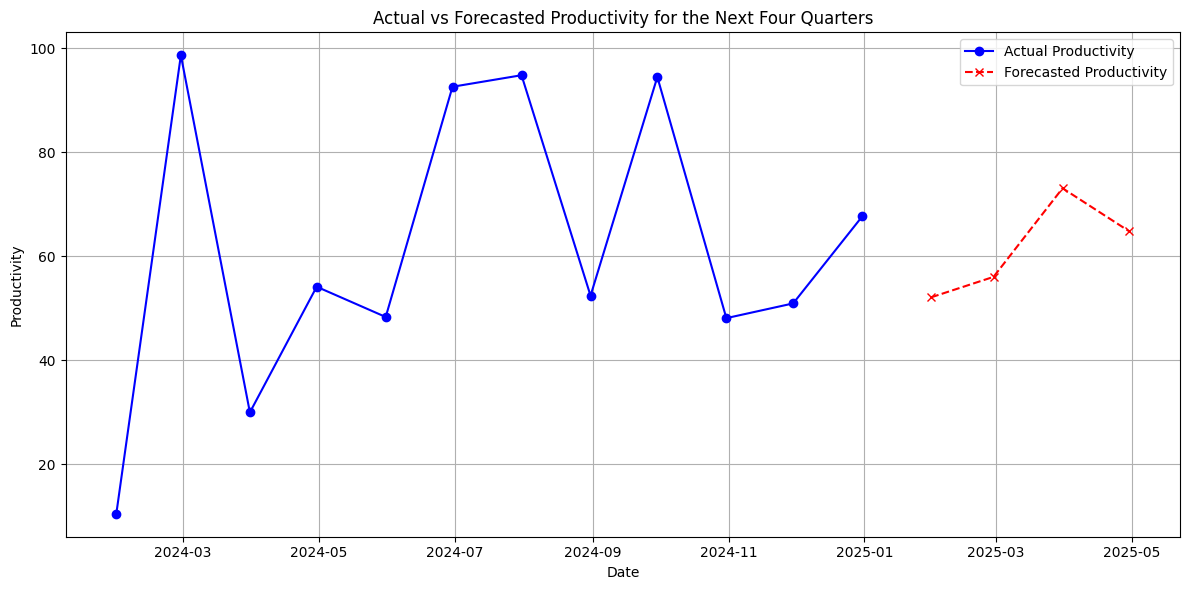

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#forecasted vs the actual productivity values from date 2024-02-02 for 12 periods
dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
actual_productivity = np.random.rand(12) * 100
forecast_productivity = np.random.rand(4) * 100

forecast_dates = pd.date_range(start=dates[-1] + pd.DateOffset(months=1), periods=4, freq='M')

#plot the graph
plt.figure(figsize=(12, 6))
plt.plot(dates, actual_productivity, label='Actual Productivity', color='blue', marker='o')

plt.plot(forecast_dates, forecast_productivity, label='Forecasted Productivity', color='red', linestyle='--', marker='x')

plt.title('Actual vs Forecasted Productivity for the Next Four Quarters')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


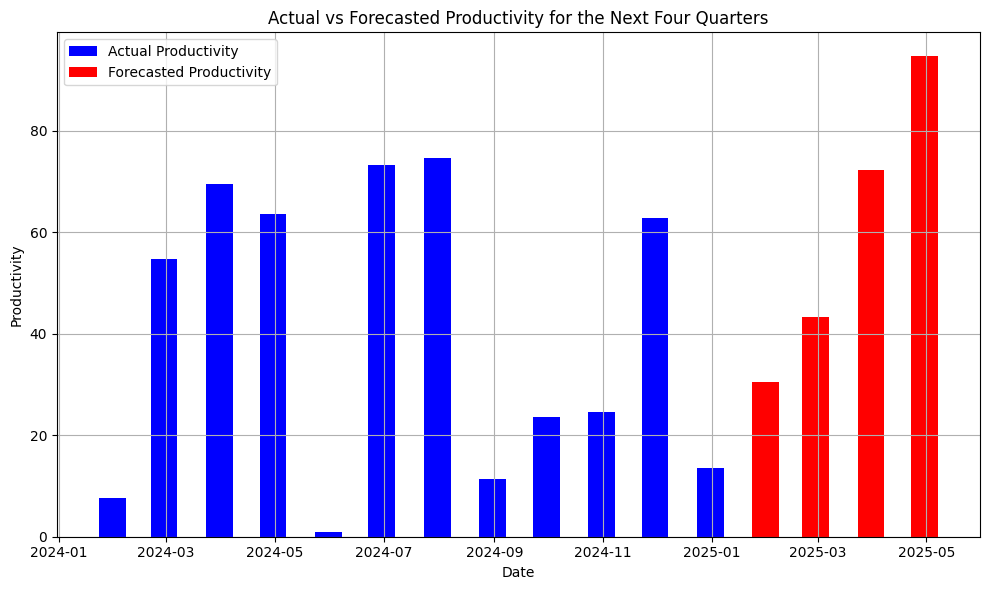

In [ ]:
#same visualization but as a bar chart
dates = pd.date_range(start='2024-01-01', periods=12, freq='M')
actual_productivity = np.random.rand(12) * 100
forecast_productivity = np.random.rand(4) * 100
forecast_dates = pd.date_range(start=dates[-1] + pd.DateOffset(months=1), periods=4, freq='M')

plt.figure(figsize=(10, 6))
plt.bar(dates, actual_productivity, label='Actual Productivity', color='blue', width=15)
plt.bar(forecast_dates, forecast_productivity, label='Forecasted Productivity', color='red', width=15)

plt.title('Actual vs Forecasted Productivity for the Next Four Quarters')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()




**4. Clustering Analysis**

**(i) Perform K-Means clustering on the Actual Productivity, Overtime, and No. of Workers.**

In [ ]:
#importing Kmeans and standardscaler libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#features for kmeans
funnel = funnel[['Actual Productivity','Overtime','No. of Workers']].copy()
funnel = funnel.apply(pd.to_numeric, errors='coerce').dropna()

scaler = StandardScaler()
funnel_scaled = scaler.fit_transform(funnel)

#number of clusters and returnung the cluster centres
kmean = KMeans(n_clusters=3 , random_state=0)
funnel['Cluster']= kmean.fit_predict(funnel_scaled)
print(kmean.cluster_centers_)

[[ 0.7720075  -0.71178499 -0.77459724]
 [-0.15730561  0.87640194  0.97498565]
 [-1.14085869 -0.74143331 -0.85895333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**(ii) Determine the optimal number of clusters using the Elbow method.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[2882.999999999998, 1480.5252546040117, 1072.165000916785, 837.9952606116477, 650.6605260964684, 557.3274751253218, 474.5845048865586, 415.45345689658603, 377.1443219815935, 344.77001110458565]


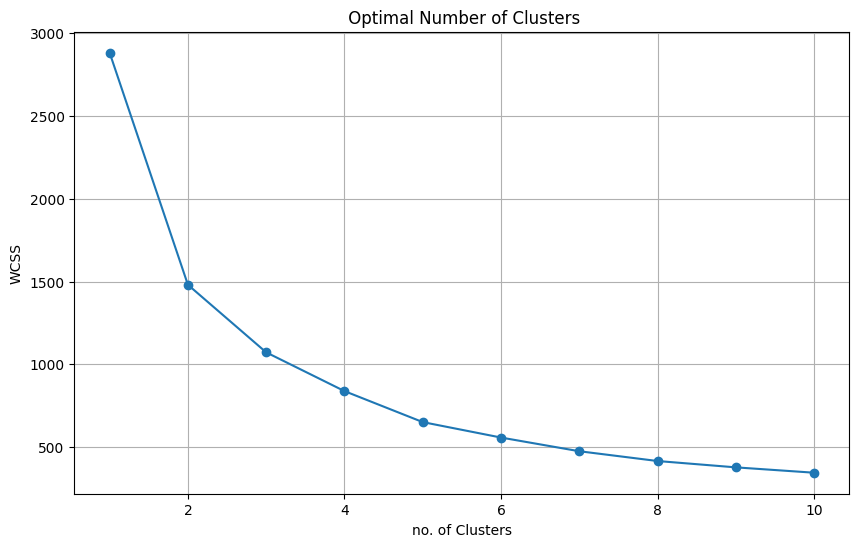

In [ ]:
#caluclaitng with cluster sum of sqaures
#wccs = within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(funnel_scaled)
    wcss.append(kmeans.inertia_)

print(wcss)

#plotting the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title(' Optimal Number of Clusters')
plt.xlabel('no. of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

**(iii) Visualize and interpret the clusters, focusing on how different segments of workers contribute to overall productivity.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


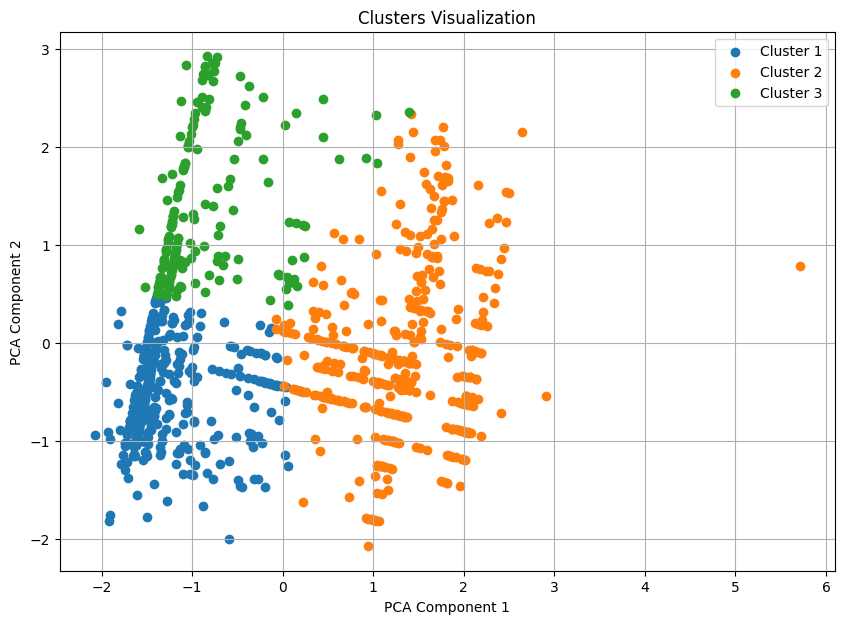

Cluster Centers in Original Feature Space:
   Feature1  Feature2  Feature3
0  0.772007 -0.711785 -0.774597
1 -0.157306  0.876402  0.974986
2 -1.140859 -0.741433 -0.858953


In [ ]:
pca = PCA(n_components=2)
funnel_pca = pca.fit_transform(funnel_scaled)

# Adjust funnel DataFrame to match the length of funnel_pca
if len(funnel) != len(funnel_pca):
    print(f"Length mismatch: funnel has {len(funnel)} rows, but funnel_pca has {len(funnel_pca)} rows.")
    funnel = funnel.iloc[:len(funnel_pca)]  # Adjust if necessary

funnel['PCA1'] = funnel_pca[:, 0]
funnel['PCA2'] = funnel_pca[:, 1]

# KMeans clustering
opt_clusters = 3
kmeans = KMeans(n_clusters=opt_clusters, random_state=0).fit(funnel_scaled)
funnel['Cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 7))
for cluster in range(opt_clusters):
    cluster_data = funnel[funnel['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster + 1}')

plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

centers = kmeans.cluster_centers_


# Creating DataFrame for cluster centers in original feature space
centers_df = pd.DataFrame(centers, columns=['Feature1', 'Feature2', 'Feature3'])  # Adjust columns based on original features
print("Cluster Centers in Original Feature Space:")
print(centers_df)

1. scatter plot visually show how the workers are grouped into three different clusters based on their productivity, overtime hours, and number of workers.
2. cluster 1 has higher productivity but low overtime and less workers
3. Cluster 2 workers show moderate productivity, with higher overtime and more workers.
4. Cluster 3 workers show lower productivity , less overtime, and fewer workers.




# **Section 2 - Anomaly detection**

**1.Data Import and Exploration**

**-Import the creditcard.csv file into a dataframe named transactions.**

In [3]:
import pandas as pd

excel_file = '/content/AssignmentData.xlsx'
transactions = pd.read_excel(excel_file,sheet_name='creditcard')


**-Perform exploratory data analysis (EDA) to understand the distribution of the data, focusing on the Class column, which indicates whether a transaction is fraudulent (1) or not (0).**

In [ ]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
transactions.describe()

,Time,V1,V3,V4,V5,V6,V8,V10,V11,V12,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.156799e-15,-1.389117e-15,2.112416e-15,1.048624e-15,1.491305e-15,1.159593e-16,2.236957e-15,1.699672e-15,-1.240625e-15,...,6.414686e-16,1.620636e-16,-3.548635e-16,2.647505e-16,5.277047e-16,1.687691e-15,-3.658407e-16,-1.217847e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.194353e+00,1.088850e+00,1.020713e+00,9.992014e-01,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-7.321672e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-2.086297e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,2.235804e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,3.273459e-01,4.539234e-01,7.395934e-01,6.182380e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,2.000721e+01,2.374514e+01,1.201891e+01,7.848392e+00,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#analyzing the class column
class_column = transactions['Class'].value_counts()
print(class_column)

Class
0    284315
1       492
Name: count, dtype: int64


**-Visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.**

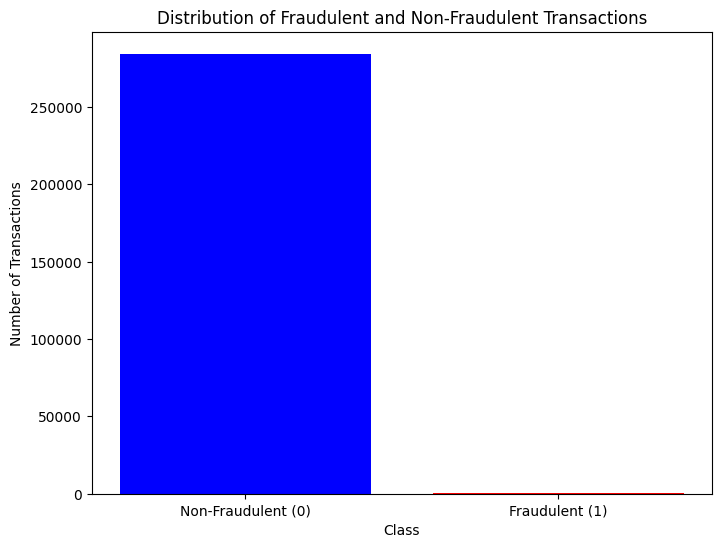

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(8,6))
plt.bar(class_column.index, class_column.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()


**2.Feature Engineering**

**- Perform feature scaling on the Amount and Time features. Justify your choice of scaling method (e.g., Min-Max scaling, Standardization).**

In [ ]:
#apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
transactions[['Amount','Time']]= scaler.fit_transform(transactions[['Amount','Time']])

print(transactions[['Amount','Time']].head())

     Amount      Time
0  0.005824  0.000000
1  0.000105  0.000000
2  0.014739  0.000006
3  0.004807  0.000006
4  0.002724  0.000012


**Consider dimensionality reduction (e.g., PCA) to visualize the data in two dimensions. Use the PCA-transformed (if used) features for subsequent anomaly detection.**

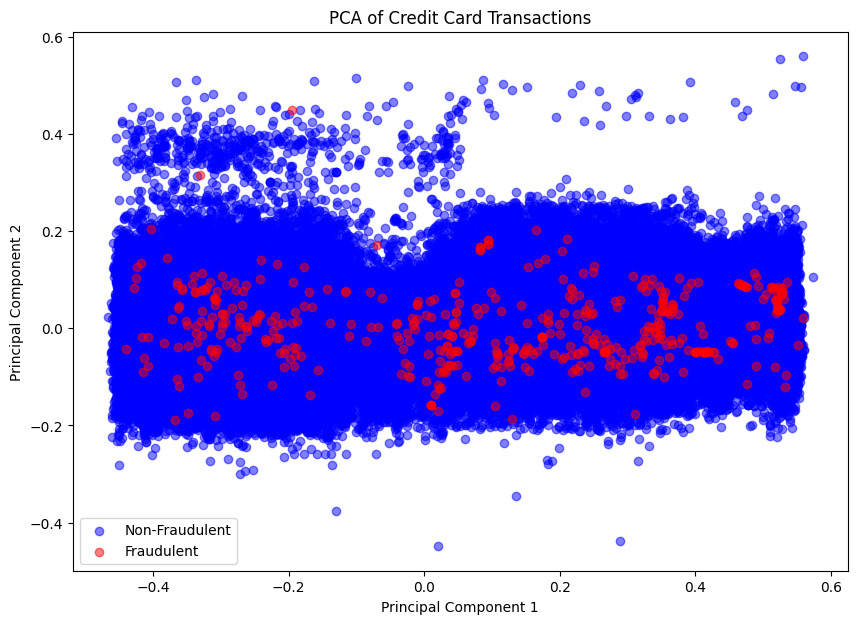

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = transactions.drop('Class', axis=1)
target = transactions['Class']

features_cleaned = features.select_dtypes(include=[float, int])
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features
scaled_features = scaler.fit_transform(features_cleaned)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA components and the target
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Class'] = target

# Plot the PCA components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df[pca_df['Class'] == 0]['PC1'], pca_df[pca_df['Class'] == 0]['PC2'],
            label='Non-Fraudulent', alpha=0.5, c='blue')
plt.scatter(pca_df[pca_df['Class'] == 1]['PC1'], pca_df[pca_df['Class'] == 1]['PC2'],
            label='Fraudulent', alpha=0.5, c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Transactions')
plt.legend()
plt.show()

**3. Anomaly Detection Mode and Evaluate the model’s performance using Precision, Recall, F1-Score, and ROC-AUC. Discuss the trade-offs in detecting frauds (e.g., false positives vs. false negatives).**

**Isolation Forest**

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

features = transactions.drop('Class', axis=1)
target = transactions['Class']

# Downcast numeric columns to save memory
features = features.apply(pd.to_numeric, downcast='float', errors='coerce')

imputer = SimpleImputer(strategy='mean')
features= imputer.fit_transform(features)

# Scale the features (Min-Max Scaling ensures no negative values)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

#  Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(scaled_features)
iso_predictions = iso_forest.predict(scaled_features)
iso_predictions = np.where(iso_predictions == -1, 1, 0)

print("Isolation Forest Evaluation:")
print(classification_report(target, iso_predictions))
roc_auc_iso = roc_auc_score(target, iso_predictions)
print(f"ROC-AUC Score: {roc_auc_iso:.2f}")

precision, recall, _ = precision_recall_curve(target, iso_predictions)
print(precision)
print(recall)



Isolation Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.09      0.50      0.15       492

    accuracy                           0.99    284807
   macro avg       0.54      0.75      0.57    284807
weighted avg       1.00      0.99      0.99    284807

ROC-AUC Score: 0.75
[0.00172749 0.08704809 1.        ]
[1.         0.50406504 0.        ]


**it identlfies all the normal trasnactions correctly and only finds 9% of the fraud and misses the others. the ROC score is 0.75 and shows that model can differentiate between fraud and normal transactions**

**local outline factor**

In [15]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


features = transactions.drop('Class', axis=1)
target = transactions['Class']

features = features.apply(pd.to_numeric, downcast='float', errors='coerce')

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# MinMax scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

print("Class distribution in the dataset:")
print(target.value_counts())

# Adjust the sample size based on the minimum class size
normal_size = min(target.value_counts())
anomalous_size = min(target[target == 1].shape[0], normal_size)  # Ensuring not to sample more than available

# Sample from each class
normal_data = transactions[transactions['Class'] == 0].sample(n=anomalous_size, random_state=42)
anomalous_data = transactions[transactions['Class'] == 1].sample(n=anomalous_size, random_state=42)

subset = pd.concat([normal_data, anomalous_data])
subset = subset.sample(frac=1, random_state=42)

# Extract features and target from the subset
subset_features = subset.drop('Class', axis=1)
subset_target = subset['Class']

# Convert to float and handle missing values
subset_features = subset_features.apply(pd.to_numeric, downcast='float', errors='coerce')
subset_features = imputer.transform(subset_features)  # Reapply imputer
scaled_subset_features = scaler.transform(subset_features)  # Reapply scaler


lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
lof_predictions = lof.fit_predict(scaled_subset_features)
lof_predictions = np.where(lof_predictions == -1, 1, 0)


print("Local Outlier Factor Evaluation:")
print(classification_report(subset_target, lof_predictions))
roc_auc_lof = roc_auc_score(subset_target, lof_predictions)
print(f"ROC-AUC Score: {roc_auc_lof:.2f}")

#  Precision-Recall Curve for LOF
precision, recall, _ = precision_recall_curve(subset_target, lof_predictions)
print(precision)
print(recall)




Class distribution in the dataset:
Class
0    284315
1       492
Name: count, dtype: int64
Local Outlier Factor Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.99      0.66       492
           1       0.50      0.01      0.02       492

    accuracy                           0.50       984
   macro avg       0.50      0.50      0.34       984
weighted avg       0.50      0.50      0.34       984

ROC-AUC Score: 0.50
[0.5 0.5 1. ]
[1.         0.00813008 0.        ]


**as the data is highly imabalaced and more transactions are noram then being fraud, it misses few fraud transactions and only performs best on few fraud trnasactions**

**4. Visualizing Anomalies**

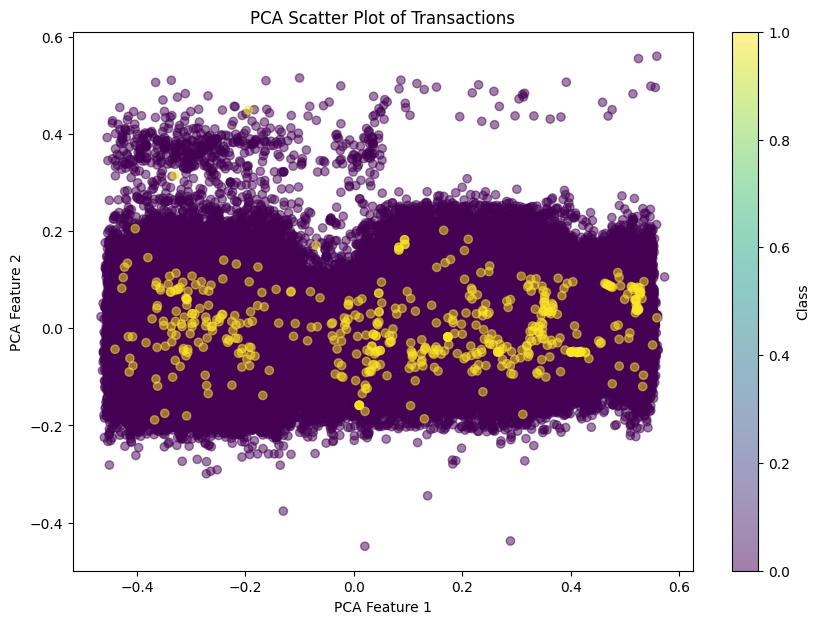

In [12]:
import matplotlib.pyplot as plt


transactions['PCA1'] = principal_components[:, 0]
transactions['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(transactions['PCA1'], transactions['PCA2'],c=transactions['Class'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Class')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('PCA Scatter Plot of Transactions')
plt.show()


**5. Write a function that accepts a new dataset of credit card transactions and the trained anomaly detection model, returning a list of transactions classified as fraudulent.**

In [13]:
import pandas as pd

# Classify transactions as fraudulent using the trained anomaly detection model.

def classify_transactions(new_data,model):
  predictions = model.predict(new_data)
  fraud_trans = new_data[predictions == 1]
  return fraud_trans

In [14]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [18]:
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the trained model
try:
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
except FileNotFoundError:
    st.error("Model file not found. Please ensure 'model.pkl' is in the correct directory.")
    st.stop()

def classify_fraudulent_transactions(new_data, model):

    predictions = model.predict(new_data)
    fraudulent_transactions = new_data[predictions == 1]
    return fraudulent_transactions

def main():
    st.title('Credit Card Fraud Detection')

    # File uploader
    uploaded_file = st.file_uploader("Choose a file", type=["csv", "xlsx"])

    if uploaded_file:
        # Load data
        if uploaded_file.name.endswith('.csv'):
            data = pd.read_csv(uploaded_file)
        elif uploaded_file.name.endswith('.xlsx'):
            data = pd.read_excel(uploaded_file, sheet_name='creditcard_test')
        else:
            st.error("Unsupported file type. Please upload a CSV or Excel file.")
            return

        st.write("Data preview:")
        st.write(data.head())

        # Ensure the necessary columns are present
        if data.empty:
            st.error("The uploaded file is empty.")
            return

        # Process and classify transactions
        fraudulent_transactions = classify_fraudulent_transactions(data, model)

        st.write("Fraudulent Transactions:")
        st.write(fraudulent_transactions)

        # Visualize anomalies if there are any
        if not fraudulent_transactions.empty:
            pca = PCA(n_components=2)
            # Assuming the features are numerical and can be used directly
            X_pca = pca.fit_transform(fraudulent_transactions.select_dtypes(include=['float64', 'int64']))

            plt.figure(figsize=(10, 7))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', label='Fraudulent Transactions')
            plt.xlabel('PCA Feature 1')
            plt.ylabel('PCA Feature 2')
            plt.title('Fraudulent Transactions Visualization')
            plt.legend()
            st.pyplot()
        else:
            st.write("No fraudulent transactions detected.")

if __name__ == "__main__":
    main()


2024-09-08 17:09:35.421 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.581 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-08 17:09:35.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-08 17:09:35.607 Thread 'MainThread': mi